create restaurants table

In [1]:
import sqlite3
from database.database_helper import create_restaurants_table
db_connection = sqlite3.connect('hometimeABM_database.db')
create_restaurants_table(db_connection)

In [2]:
from database.database_helper import add_restaurant
add_restaurant(db_connection, 'Big Burger House', 69.69, 69.69)
add_restaurant(db_connection, 'Fabulous Fish n chips', 33.33, 33.33)
add_restaurant(db_connection, 'Cheesy does it', 75.00, 65.00)
add_restaurant(db_connection, 'Pizza Perfection', 25.00, 15.50)
add_restaurant(db_connection, 'Ace Cafe', 95.00, 50.00)

In [3]:
from database.database_helper import get_all_restaurants
get_all_restaurants(db_connection)

[('Big Burger House', 69.69, 69.69),
 ('Fabulous Fish n chips', 33.33, 33.33),
 ('Cheesy does it', 75.0, 65.0),
 ('Pizza Perfection', 25.0, 15.5),
 ('Ace Cafe', 95.0, 50.0)]

This is an initial run of our model

In [4]:
from model.model import HometimeModel

model = HometimeModel(db_connection)
for i in range(0, 100):
    model.step()

utility is 0.5428790705620972
94's utility is 0.6049443481165564
94's utility is 0.5421186280968275
94's utility is 2.0104760421970953
31 stage one
31's utility is 0.28358901352959387
31's utility is 0.4199611978448138
31's utility is 0.0874589077928414
31's utility is 0.296041752893691
31's utility is 1.9085150979292407
89 stage one
89's utility is 0.2906524397058483
89's utility is 0.2671351034538939
89's utility is 1.779568727302379
89's utility is 0.22461403196305263
89's utility is 0.43987359189856995
65 stage one
65's utility is 0.4663627742323551
65's utility is 2.082574083921886
65's utility is 0.12006532117667956
65's utility is 0.5258828074460268
65's utility is 0.14161164025882622
13 stage one
13's utility is 0.9588474992221617
13's utility is 2.3154077596690215
13's utility is 0.9851901276252916
13's utility is 0.16426207529692044
13's utility is 0.7984009088591221
56 stage one
56's utility is -1.3530090149806835
56's utility is -1.4898155538235434
56's utility is -1.313602

In [6]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
agent_vars.head()

Last Choice
Step AgentID            
0    0              None
     1              None
     2              None
     3              None
     4              None

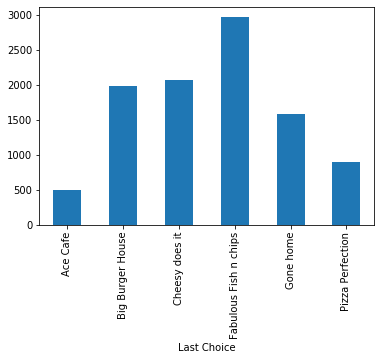

In [7]:
agent_vars.fillna('Gone home').groupby('Last Choice').size().plot.bar()

In [8]:
model_vars = model.datacollector.get_model_vars_dataframe()
model_vars.head()

,Good weather
0,True
1,False
2,True
3,False
4,True


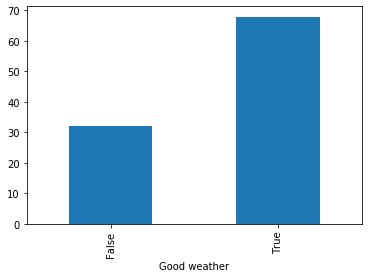

In [9]:
model_vars.groupby('Good weather').size().plot.bar()

In [10]:
agent_vars.to_csv("agent.csv")
model_vars.to_csv("model.csv")